# FML Assignment 3

# How linear regression works

Linear regression is a model that depends on the y(dependant) and x(independant) variables for predicting the dependant variavle (y). The model is a straight line. Multiple linear regression is a linear model with multiple independent variables (predictors).

Linear Relation Model:

y = b0 + b1x e

b0 -intercept

b1 - slope

e - error/ residual, whats left over and can't be explained

y - dependat variable

x - independant variable

nr 0 and 1 (both lowercase) -> 0 is parameters, 1 is coeffectants

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The head() of the resulting data frame

In [6]:
df = pd.read_csv('dataMashable.csv')
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


# Creating a subset dataframe for the x variable

The x contents were selected as they are all not "dummy variables".

In [7]:
df_subset = df[["n_tokens_title", "n_tokens_content", "average_token_length", "global_subjectivity", "global_sentiment_polarity"]]
df_subset.head()

,n_tokens_title,n_tokens_content,average_token_length,global_subjectivity,global_sentiment_polarity
0,10,821,4.518879,0.439379,0.082486
1,9,489,5.040900,0.300454,0.027715
2,11,131,4.877863,0.575486,0.259120
3,8,556,4.974820,0.327220,0.134424
4,9,880,4.928409,0.507709,0.109256


# Assigning the x and y variables for the model

Where X is the df_subset created previously, and Y is the shares_lof from the inital dataframe. The items are identified through the URL of the page.

In [8]:
y = df['shares_log'] 
X =  df_subset
X.index = df['url']
X.head()

,n_tokens_title,n_tokens_content,average_token_length,global_subjectivity,global_sentiment_polarity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,10,821,4.518879,0.439379,0.082486
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,9,489,5.040900,0.300454,0.027715
http://mashable.com/2013/02/01/hello-kitty-rocket/,11,131,4.877863,0.575486,0.259120
http://mashable.com/2014/02/06/add-us-on-snapchat/,8,556,4.974820,0.327220,0.134424
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,9,880,4.928409,0.507709,0.109256


# Splitting the data into training 70% and test data 30%

In [9]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state".
#This means if we run the code again, it will produce the same results.
#test_size = 0.3, so splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,n_tokens_title,n_tokens_content,average_token_length,global_subjectivity,global_sentiment_polarity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,141,4.560284,0.451711,0.230736
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,392,4.732143,0.476976,0.078816
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,622,4.710611,0.488495,0.263511
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,251,4.669323,0.545746,0.052758
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,940,4.511702,0.507042,0.063513


# Training the model to predict shares using five X variables

In [10]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [11]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.002817,n_tokens_title
0.000022,n_tokens_content
-0.063819,average_token_length
0.508590,global_subjectivity
0.122868,global_sentiment_polarity


We can interpret these coefficients as follows:
The intercept makes no sense and does not need to be interpreted. Because it's the value for all X's are 0. 
As the global_subjectivity is higher than the rest (0.508590) it has the highest correlation to the amount of shares.

# An equation of the model (using Markdown formulas)

In [12]:
lm.fit(X, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.31 + -0.00X


The regression line is equal to  y = 3.31 + -0.00X
Or, in a  Markdown formula (using $ to begin and end a formula):
$y = 3.31 + -0.00X$ 

# Evaluating the model on the test data

In [13]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.021740985213041575

The R^2 is 0.025, which means 2,5% of the variation in amount of shares is explained by the model. Which means the model is quite inaccurate and unreliable. 

In [14]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40159356330813994

The RMSE (the root mean squared error) is 0.40. Which means that we are typically about 0.40 off in our predicted shares.

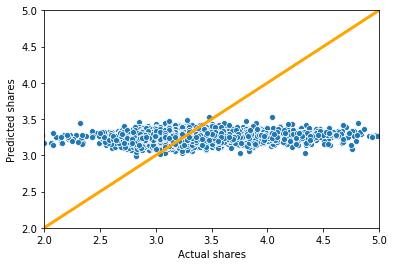

In [15]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([2,5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2,5])
plt.plot([2, 5], [2, 5], color='orange', lw=3) #Plot a diagonal length
plt.show()

The predictions are quite unbalanced. There are some quite poor and great articles with very little or very high shares, that the model doesn't predict  well (the model predicts them too low ar high: we can see that because they are plotted right or left from the red line), and overall the model is doing a poor job.

#  Plots of the relation of selected variables with the target

In [16]:
y_pred = lm.predict(X_test) #generate predictions
resid = y_pred - y_test #get residuals by subtracting the prediction from the actual shares

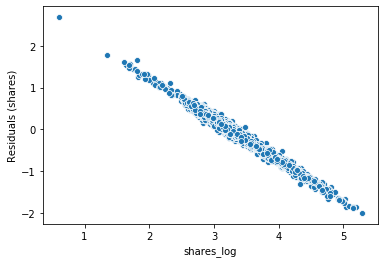

In [17]:
sns.scatterplot(x=y_test, y=resid, data=df)
plt.xlabel('shares_log')
plt.ylabel('Residuals (shares)')
plt.show()

This plot shows that the errors are quite far off. Example: when there are 4 shares, the predictive model adds +1 and in order to fix that the model removes -1 for correcting the error.

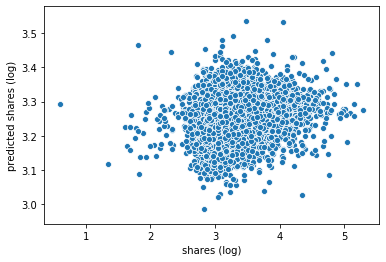

In [19]:
sns.scatterplot(x=y_test,y=y_pred, data=df)
plt.xlabel('shares (log)')
plt.ylabel('predicted shares (log)')
plt.show()

This plot shows that the predicted shares are quite far from the actual amount of shares.